# 1.Configuración del ambiente


## 1.1 Variables

En el proyecto usaremos 5 variables que serán manipuladas dentro de varias funciones, estas variables son conocidas como variables globales, es necesario que las definas aquí de la siguiente forma:

In [1]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

## 1.2 Librerias

Para estar seguros de que tenemos todo listo en nuestro Ambiente, podemos ejecutar las siguientes líneas de código:

In [8]:
!python -V
print('------')
!pip show Pandas | findstr "Name Version"
print('------')
!pip show Numpy | findstr "Name Version"
print('------')
!pip show Matplotlib | findstr "Name Version"


Python 3.11.9
------
Name: pandas
Version: 2.2.2
------
Name: numpy
Version: 1.26.4
Name: lapack-lite
Name: tempita
Name: dragon4
Name: libdivide
Name: Meson
Name: spin
Name: OpenBLAS
Name: LAPACK
Name: GCC runtime library
Version 3.1, 31 March 2009
                       Version 3, 29 June 2007
  5. Conveying Modified Source Versions.
  14. Revised Versions of this License.
Name: libquadmath
------
Name: matplotlib
Version: 3.10.0


# 2.Obtención de datos

In [9]:
# Instalar la biblioteca yfinance si aún no está instalada
!pip install yfinance

## 2.1 Obtener el historico del bitcoin con yfinance

Utilizaremos la biblioteca yfinance d|e Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, estos datos se extraeran siendo el histórico de los últimos 7 días en intervalos de 5 minutos.

Este histórico se guardara en el dataframe df_bitcoin, adicionalmente se exportara a la carpeta data en caso de querer operar los datos guardados.

In [ ]:
import yfinance as yf
import pandas as pd
import os
from datetime import datetime,timedelta

def importar_base_bitcoin():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

  hoy = datetime.now()
  inicio = hoy - timedelta(days=7)
  
  print(f"Importando datos desde {inicio} hasta {hoy}")

  # Descargar el histórico de precios de Bitcoin (BTC-USD) de los últimos 7 días con intervalos de 5 minutos
  df_bitcoin = yf.download('BTC-USD', start = inicio, end=hoy ,interval='5m')

  # Verificar si se obtuvieron datos
  if df_bitcoin.empty:
    print("⚠️ No se pudieron obtener datos de Bitcoin. Verifica la conexión o la API de Yahoo Finance.")
    return
  
  # Mostrar las primeras filas para asegurarnos de que los datos se cargaron correctamente
  print(df_bitcoin.head())

  # Guardar el dataframe en la carpeta 'data'
  ruta_data = r"../data"
  os.makedirs(ruta_data, exist_ok=True)  # Crear la carpeta si no existe

  ruta_archivo = os.path.join(ruta_data, "bitcoin.csv")
  df_bitcoin.to_csv(ruta_archivo,index=True) # Guardar el CSV con índices de fecha y hora

  print(f"✅ Datos guardados correctamente en {ruta_archivo}")

# Llamar a la función para importar los datos
importar_base_bitcoin()

Importando datos desde 2025-02-03 15:19:23.471068 hasta 2025-02-10 15:19:23.471068


[*********************100%***********************]  1 of 1 completed

Price                             Close          High           Low  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Datetime                                                              
2025-02-03 15:20:00+00:00  97823.468750  97823.468750  97177.289062   
2025-02-03 15:25:00+00:00  98147.906250  98585.226562  98066.664062   
2025-02-03 15:30:00+00:00  98248.875000  98484.968750  98107.500000   
2025-02-03 15:35:00+00:00  98123.835938  98433.296875  98123.835938   
2025-02-03 15:40:00+00:00  98987.562500  98987.562500  98158.429688   

Price                              Open      Volume  
Ticker                          BTC-USD     BTC-USD  
Datetime                                             
2025-02-03 15:20:00+00:00  97177.289062           0  
2025-02-03 15:25:00+00:00  98066.664062  1486381056  
2025-02-03 15:30:00+00:00  98484.968750   540213248  
2025-02-03 15:35:00+00:00  98430.539062   574373888  
2025-02-03 15:40:00+00:00  98158.429688   608739328  

In [15]:
df_bitcoin.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,
2025-02-03 15:20:00+00:00,97823.468750,97823.468750,97177.289062,97177.289062,0
2025-02-03 15:25:00+00:00,98147.906250,98585.226562,98066.664062,98066.664062,1486381056
2025-02-03 15:30:00+00:00,98248.875000,98484.968750,98107.500000,98484.968750,540213248
2025-02-03 15:35:00+00:00,98123.835938,98433.296875,98123.835938,98430.539062,574373888
2025-02-03 15:40:00+00:00,98987.562500,98987.562500,98158.429688,98158.429688,608739328


## 2.2 Obtener el precio actual y la tendecia del bitcoin con Web Scraping

Utilizando la biblioteca BeautifulSoup se realizarara Web Scraping de la página https://coinmarketcap.com/ para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h % . 

El precio se convertira a tipo float y se guadara en la variable llamada precio_actual.  

En la variable tendencia guardaremos el valor de 'baja'si la variación del precio es negativa, sino, guardaremos el valor de 'alta'.

In [16]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

def extraer_tendencias():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

  # Obtener los datos de coinmarketcap con BeatufiulSoup
  url = 'https://coinmarketcap.com/es/'
  response = urlopen(url)
  html = response.read()
  soup = BeautifulSoup(html, 'html.parser')

  # Precio actual del bitcoin
  precio_element = soup.find('td',style="text-align:end")
  precio_actual = float(precio_element.div.span.getText().replace('$','').replace(',',''))

  # Porcentaje de tendencia en una hora
  tendencia_element = soup.find('td',style="text-align:end").find_next_sibling()
  porcentaje = tendencia_element.span.getText()

  # Tendencia
  if tendencia_element.span.span['class'][0] == 'icon-Caret-down':
    tendencia = 'baja'
  else:
    tendencia = 'alta'

  # Imprimir los resultados para verificar
  print(f"Precio Actual del Bitcoin: {precio_actual} USD")
  print(f"Variación en la última hora: {porcentaje}")
  print(f"Tendencia: {tendencia}")

extraer_tendencias()

Precio Actual del Bitcoin: 97217.64 USD
Variación en la última hora: 0.06%
Tendencia: baja


# 3.Limpieza de datos

Antes de limpiar la base, crearemos una copia de la base df_bitcoin para la limpieza en esta nueva base(df_bitcoin_limpio), sin modificar la base original, además es importante entender su contenido y entender que la informacion tiene multiples indices **Price** y **Ticker**:

| Columna   | Descripción |
|-----------|------------|
| **Datetime** | Índice del DataFrame. Contiene la fecha y hora del intervalo seleccionado. No puede estar duplicado. |
| **Open** | Precio del Bitcoin al inicio del intervalo. |
| **High** | Precio más alto del Bitcoin durante el intervalo. |
| **Low** | Precio más bajo del Bitcoin durante el intervalo. |
| **Close** | Precio del Bitcoin al final del intervalo. |
| **Volume** | Total de transacciones hechas durante el intervalo. |

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df_bitcoin.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Datetime,,,,,
2025-02-03 15:20:00+00:00,97823.468750,97823.468750,97177.289062,97177.289062,0
2025-02-03 15:25:00+00:00,98147.906250,98585.226562,98066.664062,98066.664062,1486381056
2025-02-03 15:30:00+00:00,98248.875000,98484.968750,98107.500000,98484.968750,540213248
2025-02-03 15:35:00+00:00,98123.835938,98433.296875,98123.835938,98430.539062,574373888
2025-02-03 15:40:00+00:00,98987.562500,98987.562500,98158.429688,98158.429688,608739328


In [19]:
df_bitcoin.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

Para la limpieza utilizaremos los atributos Datetime, Close y Volume.

1. Analizar la base df_bitcoin_limpio, identificar duplicados en el índice y trátarlos para tener sólo índices únicos.

2. Agregaremos un grafico boxplot antes de la limpieza y guardaremos el grafico en results

3. Buscar por valores nulos en la columna Close y trátarlos.

4. Verificar que todos los registros de la base tengan un Volume de transacción mayor a 0, caso contrário, elimínarlos.

5. Identificar y eliminar los outliers en el precio del Bitcoin, columna Close, utilizando un gráfico de boxplot para identificarlos.

6. Filtra o selecciona únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil(Q1) y el 3er cuartil(Q3) del boxplot.

7. Finalmente, calcula el precio promedio(Close) de esta selección y guárdala en la variable media_bitcoin.

🔍 Registros antes de la limpieza: 2016


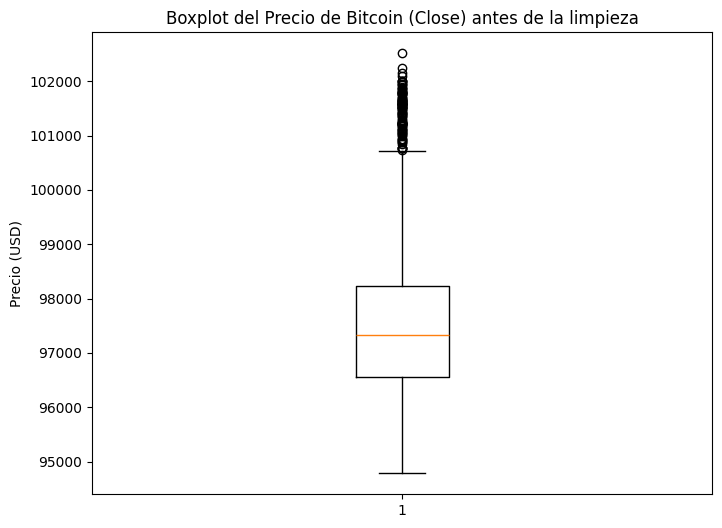

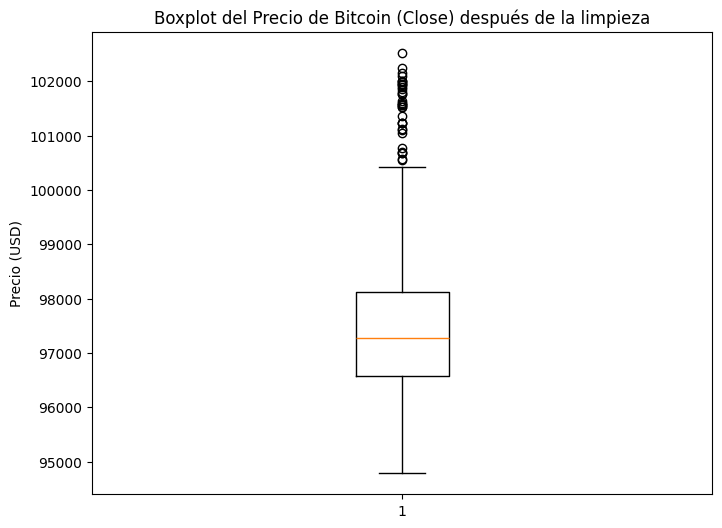

📉 Precio promedio de Bitcoin (media): 97272.39 USD
📊 Registros después de la limpieza: 476


In [24]:
def limpieza_datos():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    # Crear la carpeta 'results' si no existe
    os.makedirs(r"../results", exist_ok=True)

    # Copia de df_bitcoin para limpiar
    df_bitcoin_limpio = df_bitcoin.copy()

    # 1. Identificar y tratar duplicados en el índice (Datetime) además de limpieza en formato Fecha
    df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]
    df_bitcoin_limpio.reset_index(inplace=True)
    df_bitcoin_limpio['Datetime'] = df_bitcoin_limpio['Datetime'].dt.strftime("%d/%m/%Y %H:%M")
    df_bitcoin_limpio.set_index('Datetime', inplace=True)
    print(f"🔍 Registros antes de la limpieza: {df_bitcoin_limpio.shape[0]}")

    # 2. Boxplot antes de la limpieza
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_bitcoin_limpio[('Close', 'BTC-USD')])
    plt.title('Boxplot del Precio de Bitcoin (Close) antes de la limpieza')
    plt.ylabel('Precio (USD)')
    plt.savefig(r"../results/boxplot_before.png")
    plt.show()
    
    # 3. Buscar valores nulos en la columna 'Close' y eliminarlos
    df_bitcoin_limpio = df_bitcoin_limpio.dropna(subset=[('Close', 'BTC-USD')])

    # 4. Eliminar registros donde el Volume sea menor o igual a 0
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio[('Volume', 'BTC-USD')] > 0]

    # 5. Identificar outliers en la columna 'Close' utilizando un boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_bitcoin_limpio[('Close', 'BTC-USD')])
    plt.title('Boxplot del Precio de Bitcoin (Close) después de la limpieza')
    plt.ylabel('Precio (USD)')
    plt.savefig(r"../results/boxplot_after.png")
    plt.show()

    # Calcular los cuartiles para identificar los outliers
    Q1 = df_bitcoin_limpio[('Close', 'BTC-USD')].quantile(0.25)
    Q3 = df_bitcoin_limpio[('Close', 'BTC-USD')].quantile(0.75)
    IQR = Q3 - Q1  # Rango intercuartil

    # 6. Filtrar los registros cuyo precio (Close) esté entre el Q1 y el Q3
    df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio[('Close', 'BTC-USD')] >= Q1) &
                                          (df_bitcoin_limpio[('Close', 'BTC-USD')] <= Q3)]

    # 7. Calcular el precio promedio (media) de la columna 'Close'
    media_bitcoin = df_bitcoin_limpio[('Close', 'BTC-USD')].mean()

    # Imprimir resultados para verificar
    print(f"📉 Precio promedio de Bitcoin (media): {media_bitcoin:.2f} USD")
    print(f"📊 Registros después de la limpieza: {df_bitcoin_limpio.shape[0]}")

    return df_bitcoin_limpio

# Llamar a la función para limpiar los datos
df_bitcoin_limpio = limpieza_datos()


# 4.Tomar decisiones

Crearemos una funcion llamada tomar_decisiones(), considerando las opciones:

* Rellena la variable algoritmo_decision con el valor resultante del siguiente criterio de decisión:

* Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guarda el valor ‘Vender’.

* Si el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guarda el valor ‘Comprar’.

* Si ninguna de las 2 condiciones anteriores se cumple, entonces guarda el valor 'Esperar'.

**Extra**
Usaremos pandas_ta para agregar indicadores tecnicos dentro de estadistica utiles para activo como el bitcoin

In [25]:
# Importar pandas-ta para indicadores técnicos
import pandas_ta as ta

# Definir la función para calcular los indicadores y tomar decisiones
def tomar_decisiones():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision, color_flecha

    # Calcular el RSI con un periodo de 14 días usando el MultiIndex
    df_bitcoin[('RSI', 'BTC-USD')] = ta.rsi(df_bitcoin[('Close', 'BTC-USD')], length=14)

    # Calcular la SMA de 50 días usando el MultiIndex
    df_bitcoin[('SMA_50', 'BTC-USD')] = ta.sma(df_bitcoin[('Close', 'BTC-USD')], length=50)

    # Obtener el RSI y SMA más reciente
    rsi_actual = df_bitcoin[('RSI', 'BTC-USD')].iloc[-1]  # Último valor del RSI
    sma_50_actual = df_bitcoin[('SMA_50', 'BTC-USD')].iloc[-1]  # Último valor de la SMA de 50 días

    # Criterios de decisión
    if rsi_actual < 30 and precio_actual < sma_50_actual:
        algoritmo_decision = 'Comprar'
        color_flecha = 'green'
    elif precio_actual >= media_bitcoin and tendencia == 'baja':
        algoritmo_decision = 'Vender'
        color_flecha = 'red'
    else:
        algoritmo_decision = 'Esperar'
        color_flecha = 'orange'

    # Imprimir resultados
    print(f"RSI actual: {rsi_actual}")
    print(f"SMA 50 días actual: {sma_50_actual}")
    print(f"Decisión del algoritmo: {algoritmo_decision}")

# Llamar a la función para tomar decisiones con indicadores
tomar_decisiones()


RSI actual: 45.183746854636794
SMA 50 días actual: 97632.4446875
Decisión del algoritmo: Esperar


# 5.Visualizacion

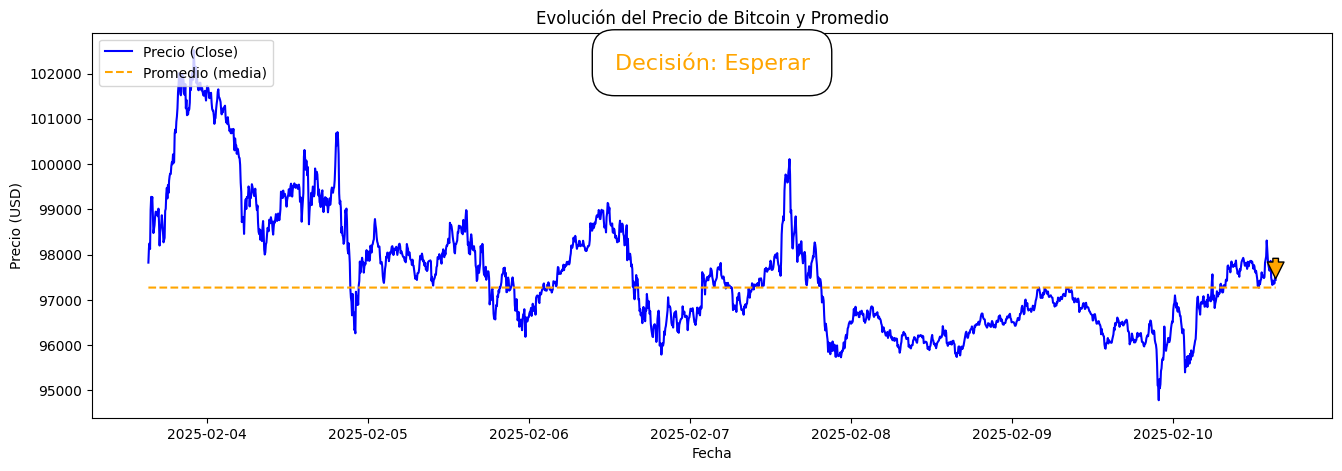

In [26]:
# Importar las bibliotecas necesarias para visualización
import matplotlib.pyplot as plt

# Definir la función de visualización
def visualizacion():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision, color_flecha

    # 1. Adicionar una nueva columna "Promedio" al dataframe df_bitcoin con el valor de media_bitcoin
    df_bitcoin[('Promedio', 'BTC-USD')] = media_bitcoin

    # 2. Configurar el tamaño del gráfico en una proporción de 16x5
    plt.figure(figsize=(16, 5))

    # 3. Adicionar un título al gráfico
    plt.title("Evolución del Precio de Bitcoin y Promedio")

    # 4. Dibujar la línea del precio "Close" en el gráfico
    plt.plot(df_bitcoin.index, df_bitcoin[('Close', 'BTC-USD')], label="Precio (Close)", color='blue')

    # 5. Dibujar la línea del "Promedio" en el gráfico
    plt.plot(df_bitcoin.index, df_bitcoin[('Promedio', 'BTC-USD')], label="Promedio (media)", color='orange', linestyle='--')

    # 6. Colocar la flecha en el último valor de 'Close'
    plt.annotate("",
                 xy=(df_bitcoin.index[-1], df_bitcoin[('Close', 'BTC-USD')].iloc[-1]),  # Último valor de 'Close'
                 xytext=(df_bitcoin.index[-1], df_bitcoin[('Close', 'BTC-USD')].iloc[-1] + 500),  # Flecha ajustada un poco más arriba
                 arrowprops=dict(facecolor=color_flecha, shrink=0.05))

    # 7. Colocar el texto de la decisión en el centro superior del gráfico
    plt.annotate(f"Decisión: {algoritmo_decision}",
                 xy=(0.5, 0.95), xycoords='axes fraction',  # Posición en el centro superior
                 fontsize=16, color=color_flecha, ha='center', va='top',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

    # 8. Configurar las etiquetas de los ejes
    plt.xlabel("Fecha")
    plt.ylabel("Precio (USD)")

    # 9. Mostrar la leyenda en la parte superior izquierda
    plt.legend(loc="upper left")

    # 10. Mostrar el gráfico
    plt.show()

# Llamar a la función para visualizar el gráfico
visualizacion()


# 6.Automatizacion

In [15]:
# Importar los métodos y bibliotecas necesarios
from IPython.display import clear_output
import time

def automatizacion():
  # Definir un loop infinito para automatizar la ejecución del código cada 5 minutos
  while True:

      # Limpiar la pantalla antes de generar un nuevo gráfico
      clear_output(wait=True)

      # Ejecutar las funciones construidas en secuencia
      importar_base_bitcoin()   # Paso 2: Obtener los datos de Bitcoin
      extraer_tendencias()      # Paso 3: Obtener las tendencias del mercado
      limpieza_datos()          # Paso 4: Limpiar los datos
      tomar_decisiones()        # Paso 5: Tomar decisiones basadas en los indicadores
      visualizacion()           # Visualizar el gráfico actualizado

      # Esperar 300 segundos (5 minutos) antes de repetir el proceso
      time.sleep(300)

2025-02-03 20:33:29.157162


[*********************100%***********************]  1 of 1 completed


Price                              Close           High            Low  \
Ticker                           BTC-USD        BTC-USD        BTC-USD   
Datetime                                                                 
2025-02-03 20:35:00+00:00  101808.367188  101907.187500  101808.367188   
2025-02-03 20:40:00+00:00  101558.906250  101825.257812  101558.906250   
2025-02-03 20:45:00+00:00  101524.140625  101524.140625  101324.742188   
2025-02-03 20:50:00+00:00  101766.781250  101766.781250  101553.453125   
2025-02-03 20:55:00+00:00  101230.265625  101630.164062  101230.265625   

Price                               Open     Volume  
Ticker                           BTC-USD    BTC-USD  
Datetime                                             
2025-02-03 20:35:00+00:00  101907.187500          0  
2025-02-03 20:40:00+00:00  101759.281250  102424576  
2025-02-03 20:45:00+00:00  101490.148438   38338560  
2025-02-03 20:50:00+00:00  101553.453125   72204288  
2025-02-03 20:55:00+00:00  10

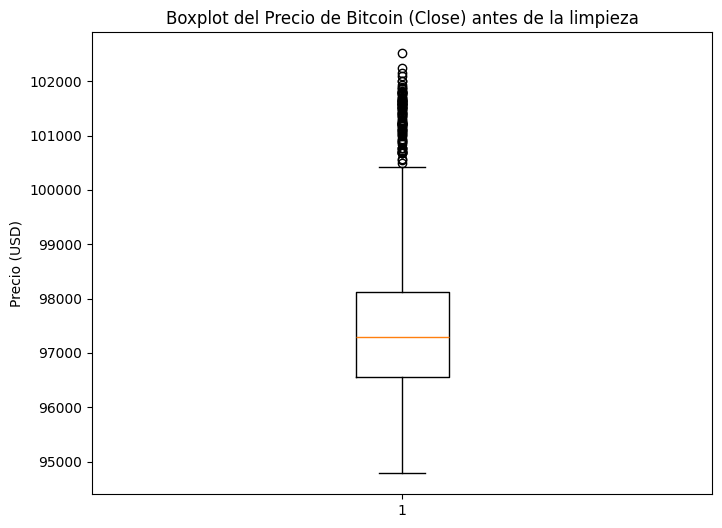

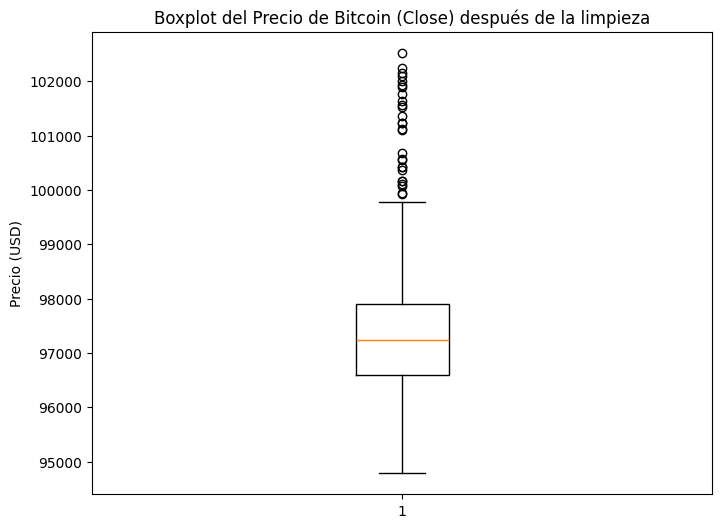

Precio promedio de Bitcoin (media): 97211.99602864584
Registros después de la limpieza: 480
RSI actual: 44.540188274907344
SMA 50 días actual: 97342.62171875
Decisión del algoritmo: Vender


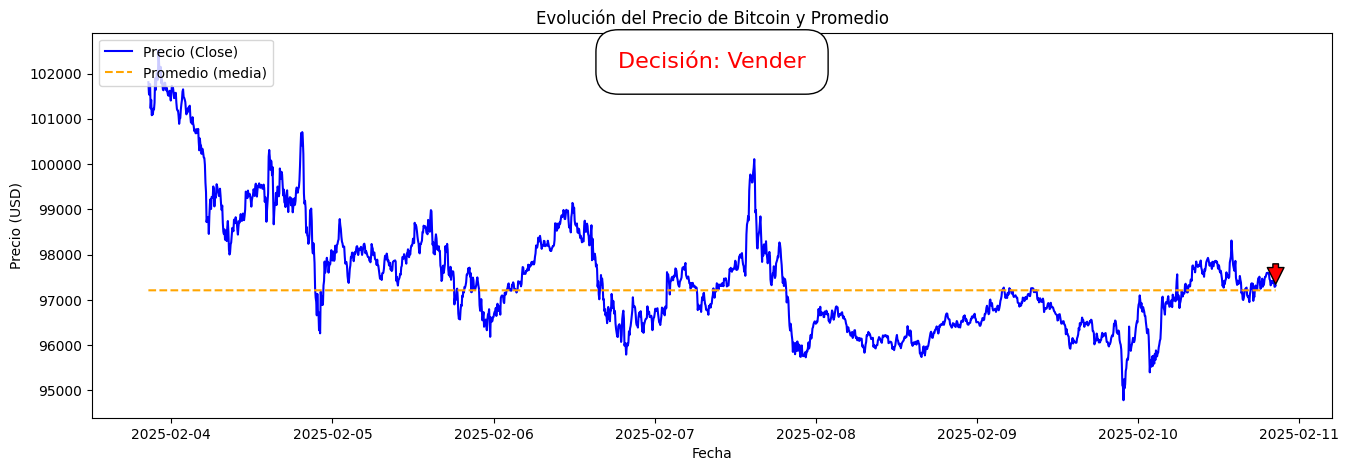

In [ ]:
automatizacion()